# Overview

1. Getting started
2. `matplotlib`
3. `seaborn`
4. `plotly`
5. Conclusion

# Getting started

## Imports for today

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import numpy.random as nr
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

## Helper function for making column names

In [2]:
import string

def gen_lab(n, m=1):
    nr.seed(0)
    '''generate a m number of n-length random labels from string.ascii_lowercase'''
    labels = []
    nr.seed(0)
    for i in range(m):
        out = nr.choice(list(string.ascii_lowercase), 2)
        labels.append(''.join(out))
    return labels

## Simulating data

In [3]:
random_data = make_classification(n_samples=1000, n_features=10, n_informative=4, random_state=0)[0]
df = pd.DataFrame(random_data, columns=gen_lab(3, 10))
df.head()

,mp,va,dd,hj,tv,se,xg,yy,mb,gh
0,1.577437,-0.536755,0.927463,-1.056626,-1.639800,-0.362200,1.729837,-0.303779,-0.709708,-0.656429
1,0.440328,-0.256900,-0.697263,-0.164554,-1.482337,0.154387,2.363339,-0.212376,-1.414759,-0.016845
2,-0.707570,-0.488871,-0.093286,-0.011284,-1.397222,-0.498530,0.989058,-0.831986,-1.888779,-0.377211
3,-2.348802,1.107457,3.240446,0.472135,-0.010949,-0.955847,-3.500250,-0.436991,-1.572894,1.005517
4,-2.497242,-1.161406,1.258685,-0.968367,-1.739517,0.155731,-2.222983,0.072632,-2.276468,0.243569


## Add a categorical value column

In [4]:
feature_types = ['gene', 'CDS', 'mRNA', 'exon', 'five_prime_UTR',
                'three_prime_UTR', 'rRNA', 'tRNA', 'ncRNA', 'tmRNA',
                'transcript', 'mobile_genetic_element', 'origin_of_replication',
                'promoter', 'repeat_region']
feature_column = pd.Series(nr.choice(feature_types, 1000), name='feature_type')
df = df.join(feature_column)

In [5]:
df.head()

,mp,va,dd,hj,tv,se,xg,yy,mb,gh,feature_type
0,1.577437,-0.536755,0.927463,-1.056626,-1.639800,-0.362200,1.729837,-0.303779,-0.709708,-0.656429,tRNA
1,0.440328,-0.256900,-0.697263,-0.164554,-1.482337,0.154387,2.363339,-0.212376,-1.414759,-0.016845,repeat_region
2,-0.707570,-0.488871,-0.093286,-0.011284,-1.397222,-0.498530,0.989058,-0.831986,-1.888779,-0.377211,ncRNA
3,-2.348802,1.107457,3.240446,0.472135,-0.010949,-0.955847,-3.500250,-0.436991,-1.572894,1.005517,CDS
4,-2.497242,-1.161406,1.258685,-0.968367,-1.739517,0.155731,-2.222983,0.072632,-2.276468,0.243569,three_prime_UTR


# Matplotlib

Because we used a notebook magic (`%`) for `matplotlib`, anything we plot with it will render in our environment.

## From scratch

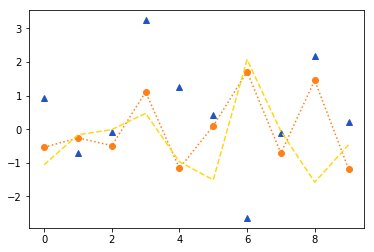

In [7]:
plt.plot(df.iloc[:10,1], color='#FF8016', marker='o', linestyle=':')
plt.plot(df.iloc[:10,2], color='#2353C0', marker='^', linestyle='')
plt.plot(df.iloc[:10,3], color='#FFD716', linestyle='--')
plt.show()

## Multiple Plots

matplotlib allows users to define the regions of their plotting canvas. If the user intends to create a canvas with multiple plots, they would use the `subplot()` function. The `subplot` function sets the number of rows and columns the canvas will have **AND** sets the current index of where the next subplot will be rendered.

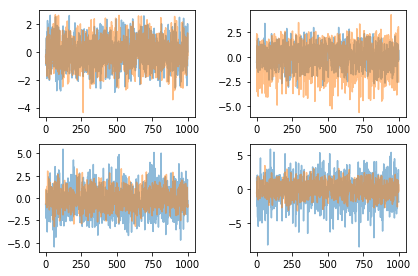

In [8]:
plt.figure(1)
# two row, two columns, first index (top-left)
plt.subplot(221)
plt.plot(df.loc[:,['se', 'yy']], alpha=0.5)

plt.subplot(222)
plt.plot(df.loc[:,['va','xg']], alpha=0.5)

plt.subplot(223)
plt.plot(df.iloc[:,8:10], alpha=0.5)

plt.subplot(224)
plt.plot(df.iloc[:,:2], alpha=0.5)

plt.subplots_adjust(top=.92, bottom=.08, left=.1, right=.95, hspace=.25, wspace=.35)
plt.show()

Text(0,0.5,'counts')

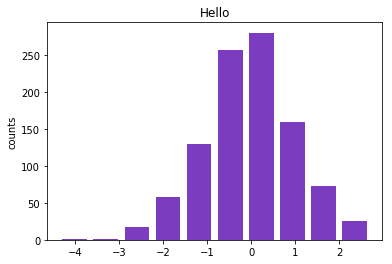

In [13]:
n, bins, patches = plt.hist(df.yy, facecolor='#5A0BB0', alpha=0.8, rwidth=.8, align='mid')
plt.title("Hello")
plt.ylabel('counts')

The biggest issue with `matplotlib` isn't its lack of power...it is that it is too much power. With great power, comes great responsibility. When you are quickly exploring data, you don't want to have to fiddle around with axis limits, colors, figure sizes, etc. Yes, you *can* make good figures with `matplotlib`, but you probably won't.

## Using pandas `.plot()`

Pandas abstracts some of those initial issues with data visualization. However, it is still `matplotlib`-esque.</br></br>
Pandas is built off of `numpy` for its caclulations, but its plotting is built off of `matplotlib`. Therefore, just like any data you get from `pandas` can be used within `numpy`, every plot that is returned from `pandas` is a `matplotlib` plot...and subject to `matplotlib` modification.

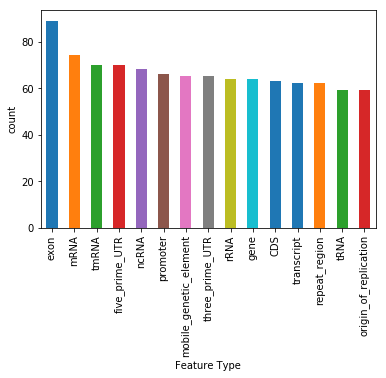

In [14]:
ax = df.feature_type.value_counts(sort=True).plot.bar()
ax.set_ylabel('count')
ax.set_xlabel('Feature Type')
plt.show()

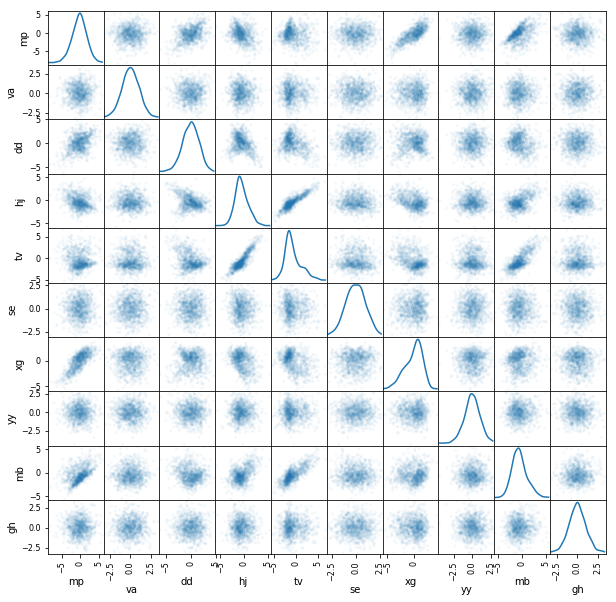

In [15]:
ax = pd.plotting.scatter_matrix(df, alpha = 0.05, figsize=(10,10), 
                                diagonal='kde')

# Seaborn

Seaborn is a library that specializes in making *prettier* `matplotlib` plots of statistical data. There was a brief introduction to seaborn in the last class, which we will re-create here.

In [16]:
import seaborn as sns

In [17]:
sns.set(style='whitegrid')

## Violin plot

Fancier box plot that gets rid of the need for 'jitter' to show the inherent distribution of the data points

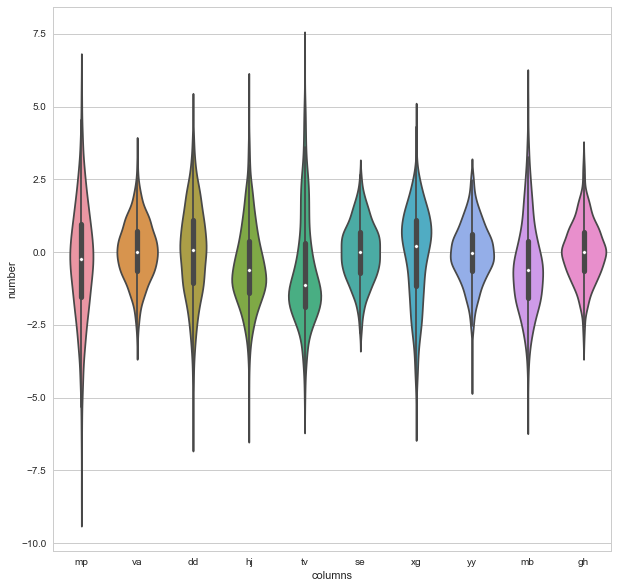

In [18]:
fig, axes = plt.subplots(figsize=(10, 10))
sns.violinplot(data=df.iloc[:,:-1], ax=axes)
axes.set_ylabel('number')
axes.set_xlabel('columns')
plt.show()

## Distplot

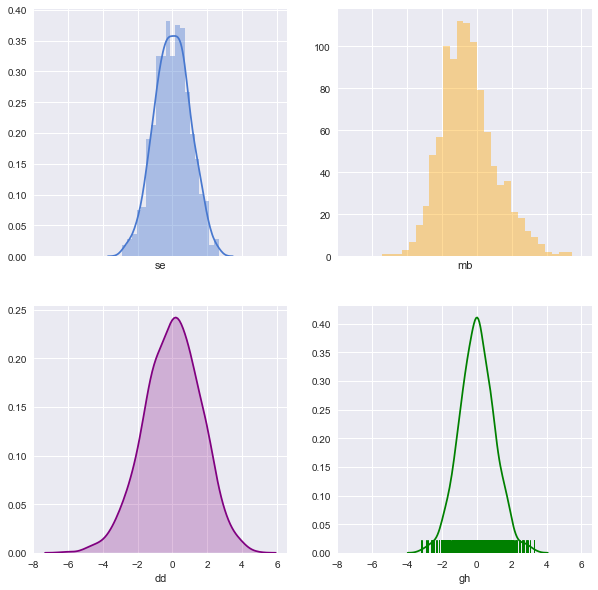

In [19]:
sns.set(palette='muted')

f, axes = plt.subplots(2,2, figsize=(10,10), sharex=True)
sns.despine(left=True)

sns.distplot(df.iloc[:, nr.randint(0,len(df.columns)-1)], ax=axes[0,0])
sns.distplot(df.iloc[:, nr.randint(0,len(df.columns)-1)], kde=False, ax=axes[0,1], color='orange')
sns.distplot(df.iloc[:, nr.randint(0,len(df.columns)-1)], hist=False, kde_kws={'shade':True}, ax=axes[1,0], color='purple')
sns.distplot(df.iloc[:, nr.randint(0,len(df.columns)-1)], hist=False, rug=True, ax=axes[1,1], color='green')

## Hexbin with marginal distributions

In [ ]:
sns.set(style='ticks')

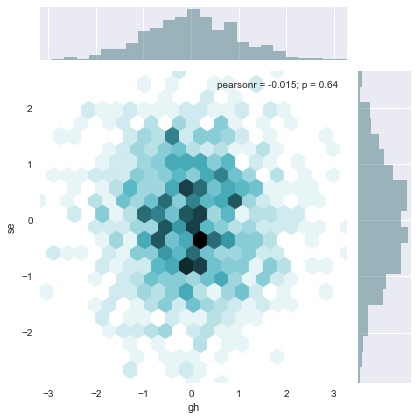

In [20]:
sns.jointplot(df.iloc[:,nr.randint(0, len(df.columns)-1)], 
              df.iloc[:,nr.randint(0, len(df.columns)-1)], 
              kind='hex', color= '#246068')

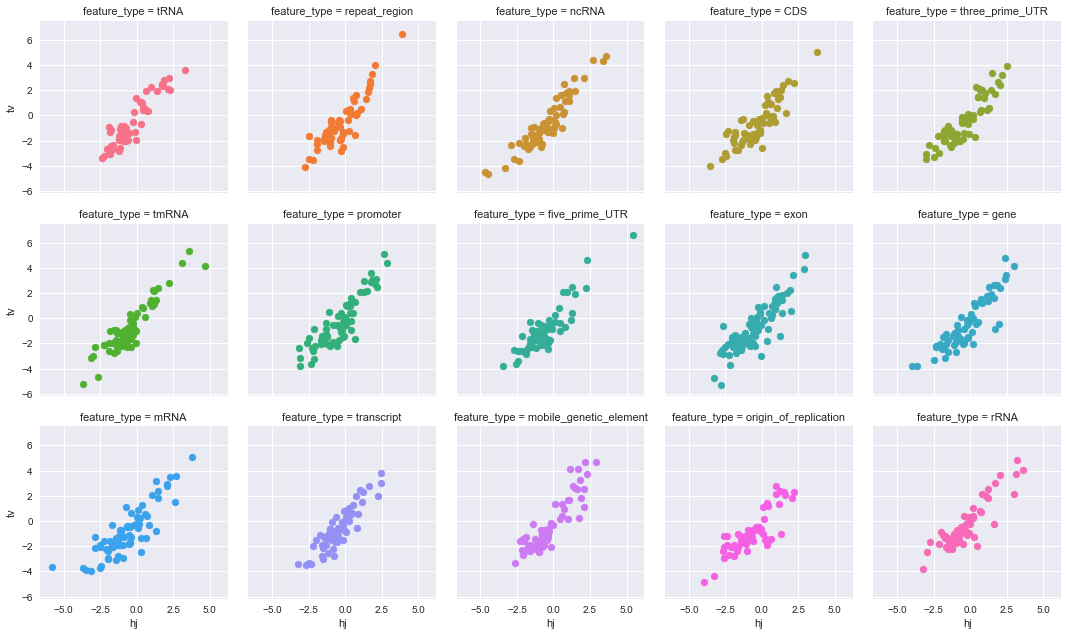

In [22]:
sns.set()

g = sns.FacetGrid(df.loc[:,['hj','feature_type', 'tv']], col='feature_type', hue='feature_type', col_wrap=5)
g.map(plt.scatter, 'hj', 'tv')

# More simulated data

In [23]:
nr.seed(0)
chromosome = pd.Series(nr.choice(range(1,23), 1000), name='chr')
alt_facts = pd.DataFrame(chromosome)
chr_len = pd.Series({1:248956422,2:242193529,3:198295559,4:190214555,5:181538259,
           6:170805979,7:159345973,8:145138636,9:138394717,10:133797422,
           11:135086622,12:133275309,13:114364328,14:107043718,15:101991189,
           16:90338345,17:83257441,18:80373285,19:58617616,20:64444167,21:46709983,22:50818468}, name='chr_len')
feature_types = ['gene', 'CDS', 'mRNA', 'exon', 'five_prime_UTR', 'three_prime_UTR', 'rRNA',
                 'tRNA', 'ncRNA', 'tmRNA', 'transcript', 'mobile_genetic_element', 
                 'origin_of_replication', 'promoter', 'repeat_region']
strand = ['.', '+', '-']
alt_facts = alt_facts.join(chr_len, on=alt_facts.chr)
alt_facts['start'] = alt_facts.apply(lambda row: nr.randint(0, row.chr_len), axis=1)
alt_facts['stop'] = alt_facts.apply(lambda row: nr.randint(row.start, row.chr_len), axis=1)
alt_facts['type'] = pd.Series(nr.choice(feature_types, len(alt_facts)), name='feat_type')
alt_facts['strand'] = pd.Series(nr.choice(strand, len(alt_facts)), name='strand')
alt_facts['score'] = pd.Series(nr.randint(10, 60, len(alt_facts)), name='score')
alt_facts['expression'] = pd.Series(np.log2(np.abs(nr.randint(0, 100) * nr.randn(len(alt_facts)) + nr.randint(0,100))), name='expression')

In [24]:
alt_facts.head()

,chr,chr_len,start,stop,type,strand,score,expression
0,13,114364328,42743068,68169834,rRNA,.,50,2.928352
1,16,90338345,81215936,88307217,three_prime_UTR,+,44,6.571889
2,22,50818468,28570453,49518654,origin_of_replication,+,54,5.148009
3,1,248956422,121843416,235286342,tRNA,+,48,3.201893
4,4,190214555,84571721,159318197,exon,.,37,6.430406


# Plotly

Plotly is project that is meant to bring ***interactive*** graphing to all common programming languages. Currently they support the following languages in one way or another:
1. JavaScript
2. Python (matplotlib, notebooks, pandas)
3. R
4. Excel
5. Node.js
6. Go
7. Ruby
8. MATLAB
9. Julia
10. Scala</br>
...

## Getting started

Many believe that because [plot.ly](https://plot.ly/) has subscription-based plans and accounts that you need to have an account and/or pay for it to use it. This isn't true. Everybody can get a **free** account that allows you save data/dashboards/plots on the cloud where they can be shared. However, a great majority of what most users need is actually free, as in you don't even need an account in the first place.

Let's install plotly (without the need for an account)

**Note:** Below is a command that should occur at the shell level when you run it. The purpose of this is to install a renderer for JupyterLab to visualize with plotly

In [ ]:
!jupyter labextension install @jupyterlab/plotly-extension

In [ ]:
import pip
pip.main(['install', 'plotly'])

We can leverage a majority of the plotly library by using `plotly.offline`

In [25]:
from plotly import tools
import plotly.graph_objs as go
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

We will get into `figure_factory` in a second, but it is of note that `figure_factory` are special high-level plots that are generated by plotly that can *only* be found in **Python**.

## First plot

Let's look at all the things we can do with plotly. [Here](https://plot.ly/python/) is the link to the Python API

In [39]:
dir(go)

['AngularAxis',
 'Annotation',
 'Annotations',
 'Area',
 'Bar',
 'Box',
 'Candlestick',
 'Carpet',
 'Choropleth',
 'ColorBar',
 'Contour',
 'Contourcarpet',
 'Contours',
 'Data',
 'ErrorX',
 'ErrorY',
 'ErrorZ',
 'Figure',
 'Font',
 'Frames',
 'Heatmap',
 'Heatmapgl',
 'Histogram',
 'Histogram2d',
 'Histogram2dContour',
 'Histogram2dcontour',
 'Layout',
 'Legend',
 'Line',
 'Margin',
 'Marker',
 'Mesh3d',
 'Ohlc',
 'Parcoords',
 'Pie',
 'Pointcloud',
 'RadialAxis',
 'Sankey',
 'Scatter',
 'Scatter3d',
 'Scattercarpet',
 'Scattergeo',
 'Scattergl',
 'Scattermapbox',
 'Scatterpolar',
 'Scatterpolargl',
 'Scatterternary',
 'Scene',
 'Stream',
 'Surface',
 'Table',
 'Trace',
 'Violin',
 'XAxis',
 'XBins',
 'YAxis',
 'YBins',
 'ZAxis',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_import',
 'graph_objs',
 'graph_objs_tools']

In [40]:
# Community Choice
trace = go.Scatter(
    x= alt_facts.expression,
    y= alt_facts.stop,
    mode='markers'
)
py.iplot([trace])

## Tables
One of the most understated things about presenting data is how important the style of tabular data is.

In [26]:
alt_facts.head()

,chr,chr_len,start,stop,type,strand,score,expression
0,13,114364328,42743068,68169834,rRNA,.,50,2.928352
1,16,90338345,81215936,88307217,three_prime_UTR,+,44,6.571889
2,22,50818468,28570453,49518654,origin_of_replication,+,54,5.148009
3,1,248956422,121843416,235286342,tRNA,+,48,3.201893
4,4,190214555,84571721,159318197,exon,.,37,6.430406


In [35]:
sample = alt_facts.sample(10)

colorscale=[[0, '#226764'], [0.5, 'white'],  [1, '#C6E6E5']]
table = ff.create_table(sample, colorscale=colorscale)
py.iplot(table, filename='table', image='png')

## Multiple plots

In [37]:
type_trace = go.Histogram(
    x = alt_facts.type
)
exp_trace = go.Scatter(
    x=alt_facts.score,
    y=alt_facts.expression,
    mode='markers'
)
len_trace = go.Scatter(
    x=alt_facts.chr,
    y=alt_facts.stop - alt_facts.start,
    mode='markers'
)

fig = tools.make_subplots(rows=2, cols=2, specs =[ [{}, {}], [{'colspan':2}, None]])

fig.append_trace(type_trace, 1, 1)
fig.append_trace(exp_trace, 1, 2)
fig.append_trace(len_trace, 2, 1)


fig['layout'].update(width=1000, height=1000)

py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



## Scatterplot Matrix

In [38]:
fig = ff.create_scatterplotmatrix(alt_facts.sample(100), diag='box', index='strand', 
                                  size=3, height=1920, width=1080, opacity=0.5)
py.iplot(fig)